In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data = pd.read_csv("Titanic dataset.csv")
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Normalization

Normalization (or min-max normalization) scales all values in a fixed range between 0 and 1. This transformation does not change the distribution of the feature and due to the decreased standard deviations, the effects of the outliers increases. 

Therefore, before normalization, it is recommended to handle the outliers



<AxesSubplot:>

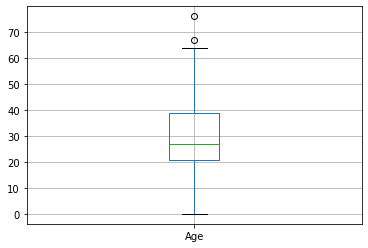

In [2]:
data.boxplot("Age")

In [3]:
for variable in data.columns:

    # create boundries (age for example)
    lower = 10
    upper = 60
    
    # replacing the outliers
    data['Age'] = np.where(data['Age'] > upper, upper, np.where(data['Age'] < lower, lower, data['Age']))
    


<AxesSubplot:>

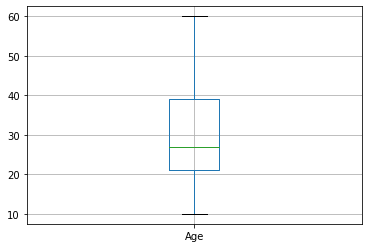

In [4]:
data.boxplot("Age")

In [8]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(data.Age.values.reshape(-1,1))

# transform training data
data.Age = norm.transform(data.Age.values.reshape(-1,1))

# transform testing dataabs


In [9]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,0.49,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,0.74,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,1.00,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,0.34,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,0.24,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,0.58,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,0.57,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


(array([32., 29., 81., 58., 22., 28., 30., 16., 11., 25.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

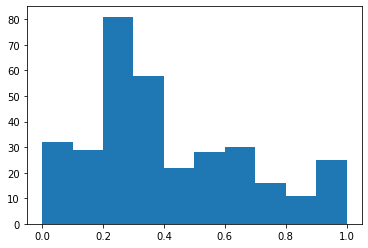

In [7]:
plt.hist(data['Age'])

# Standardization

Standardization (or z-score normalization) scales the values while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.Age = scaler.fit_transform(data.Age.values.reshape(-1,1))


In [9]:
data.Age

0      0.303423
1      1.253049
2      2.240660
3     -0.266353
4     -0.646203
         ...   
413         NaN
414    0.645288
415    0.607303
416         NaN
417         NaN
Name: Age, Length: 418, dtype: float64

(array([31., 30., 70., 54., 37., 28., 21., 25., 11., 25.]),
 array([-1.55784457, -1.1779941 , -0.79814363, -0.41829317, -0.0384427 ,
         0.34140777,  0.72125824,  1.10110871,  1.48095917,  1.86080964,
         2.24066011]),
 <BarContainer object of 10 artists>)

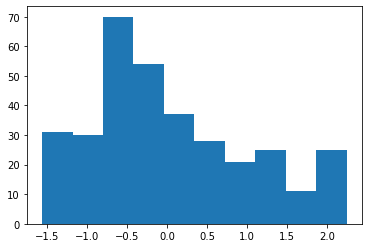

In [10]:
plt.hist(data['Age'])